<a href="https://colab.research.google.com/github/RGivisiez/TensorFlow-Templates/blob/main/Basic_Sequential_API_CallBacks_TensorBoard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [1]:
import numpy as np

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Input
from keras import layers
from keras.callbacks import ModelCheckpoint 

from tensorflow.keras.utils import plot_model

from keras.layers import Dense

### Auxiliary Functions


In [3]:
from IPython.display import display

def visualize(summary, visualize_graph, model, model_name):

  if summary == True:
    model.summary()

  if visualize_graph == True:
    try:
      display(keras.utils.plot_model(model, model_name + ".png", show_shapes=True))
    except:
      print('Run: \n!pip install pydot \
                  \n!pip install pydotplus \
                  \n!pip install graphviz \
                  \n!apt-get install graphviz -y')
        
  return

### Model Definitions

In [4]:
X = np.arange(-15, 15).astype(float).repeat(2).reshape(-1, 2)
y_hat = X[:, :1] * -1 + 5

In [5]:
print("X shape: {0}\nŷ shape: {1}".format(X.shape, y_hat.shape))

X shape: (30, 2)
ŷ shape: (30, 1)


In [6]:
loss_fn = 'MSE'
optimizer = 'adam'
metrics = ['MAE']
model_name = 'base_model'
val_metrics = 'val_loss'

In [7]:
folder_path = './logs1'

In [8]:
batch_size = 1
epochs = 2000
workers = 7

### Initialize Tensorboard

In [9]:
%load_ext tensorboard

In [10]:
%tensorboard --logdir $folder_path --host 0.0.0.0

### Create Model

In [11]:
def Sequential_Model(input):

  '''
     A Sequential model is appropriate for a plain stack of layers
     where each layer has exactly one input tensor and one output tensor.
  '''

  model = Sequential([
                       input,
                       Dense(1, activation='linear', name='weights',
                             )
                       ], name=model_name)
  
  return model

In [12]:
def Funcitonal_API(input):

  '''
     The functional API can handle models with non-linear topology,
     shared layers, and even multiple inputs or outputs.
  '''

  x = Dense(1, activation='linear', name='weights')(input)

  output = x

  model = Model(input, output, name=model_name)

  return model

In [13]:
def Create_Model(X):

  x_input = Input(shape=(X.shape[1], ), name='input_layer')

  model = Sequential_Model(x_input)
  #model = Funcitonal_API(x_input)

  return model

### Build and Compile

In [14]:
def Model_Build_Compile(X, loss_fn, metrics='accuracy',
                        optimizer='adam', summary=False,
                        visualize_graph=False):

    model = Create_Model(X)

    model.compile(
                  loss=loss_fn,
                  optimizer=optimizer,
                  metrics=metrics,
                  )

    if summary or visualize_graph == True:
      visualize(summary, visualize_graph, model, model_name)

    return model

### Visualize Model

Model: "base_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 weights (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


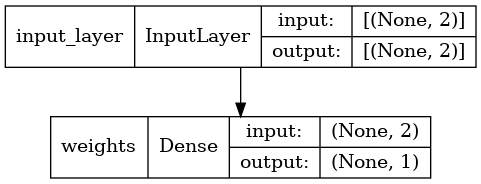

In [15]:
model = Model_Build_Compile(X, loss_fn, metrics, optimizer,
                            summary=True, visualize_graph=True)

### Callbacks - Basic

In [16]:
import os
import datetime
from datetime import datetime
import pytz

tz_SP = pytz.timezone('America/Sao_Paulo')

In [17]:
logdir = os.path.join(folder_path, model_name \
                      + '-' + datetime.now(tz_SP).strftime("%Y-%m-%d_%H:%M:%S")
                      )
print('Path to the logs: {0}'.format(logdir))

Path to the logs: ./logs1/base_model-2022-04-03_15:51:44


In [18]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir,
                                                      write_graph=False,
                                                      write_images=1,
                                                      histogram_freq=1,
                                                      )

In [19]:
checkpointer = ModelCheckpoint(folder_path + '/saved_models/',
                               monitor=val_metrics,
                               verbose=0,
                               save_freq=epochs,
                               save_best_only=True)

### Model Fit - Basic

In [20]:
hist = model.fit(X, y_hat,
                 #validation_data=(,),
                 validation_split=0.1,
                 initial_epoch=0,
                 verbose=0,
                 callbacks=[checkpointer, tensorboard_callback],
                 workers=workers,
                 batch_size=batch_size,
                 epochs=epochs,)

### Expected Result

In [21]:
# The weights are expected to sum to -1 since both entries of X
# are build with the same line equation f(x) = -x+5.
# The bias should be 5.
for layer in model.layers:
  try:
    for weights in layer.weights:
      print('\nVariable name: {0} \nvalues: \n{1}'.format(weights.name, np.round(weights.numpy(), 2)))
  except:
    print("")


Variable name: weights/kernel:0 
values: 
[[-0.84]
 [-0.16]]

Variable name: weights/bias:0 
values: 
[5.]
